# Velocities 

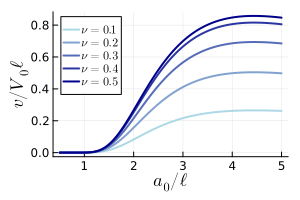

In [1]:
using Plots
using LaTeXStrings

# Define the function v_over_V0_l
function v_over_V0_l(a0_over_l, ν)
    exp_term = exp(-π^2 / a0_over_l^2)
    sin_term = abs(sin(π * ν))
    return (2 * π * exp_term * sin_term) / a0_over_l
end

# Range of a0/ell values for x-axis
a0_over_l_values = 0.5:0.01:5

# Values of ν
ν_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Manually define a set of colors transitioning from blue
colors = cgrad(:blues, length(ν_values))

# Create the plot
p = plot()
for (i, ν) in enumerate(ν_values)
    v_values_for_plot = [v_over_V0_l(a0_over_l, ν) for a0_over_l in a0_over_l_values]
    plot!(p, a0_over_l_values, v_values_for_plot, label="\$\\nu = $ν\$", color=colors[i], linewidth=2)
end

# Adding labels and legend
xlabel!(L"a_0/\ell")
ylabel!(L"v/V_0\ell")
plot!(p, legend=:topleft, size=[300,200], xlabelfontsize=12, ylabelfontsize=12)

# Show the plot
display(p)
#savefig(p, "figsaves/velocities.pdf")

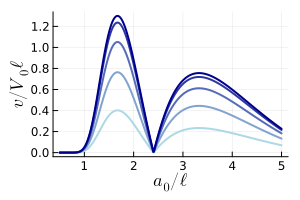

In [3]:
using Plots
using LaTeXStrings

# Define the function v_over_V0_l
function v_over_V0_l(a0_over_l, ν)
    exp_term = exp(-π^2 / a0_over_l^2)
    sin_term = sin(π * ν)
    lag_term1 = 1- (2*π^2) /(a0_over_l^2)
    lag_term2 = 1- (4*π^2) /(a0_over_l^2) + (2*π^4) / (a0_over_l^4)
    return abs((2 * π * exp_term * sin_term * lag_term2) / a0_over_l)
end

# Range of a0/ell values for x-axis
a0_over_l_values = 0.5:0.01:5

# Values of ν
ν_values = [0.1, 0.2, 0.3, 0.4, 0.5]

# Manually define a set of colors transitioning from blue
colors = cgrad(:blues, length(ν_values))

# Create the plot
p = plot()
for (i, ν) in enumerate(ν_values)
    v_values_for_plot = [v_over_V0_l(a0_over_l, ν) for a0_over_l in a0_over_l_values]
    plot!(p, a0_over_l_values, v_values_for_plot, label="\$\\nu = $ν\$", color=colors[i], linewidth=2)
end

# Adding labels and legend
xlabel!(L"a_0/\ell")
ylabel!(L"v/V_0\ell")
plot!(p, legend=false, size=[300,200], xlabelfontsize=12, ylabelfontsize=12)

# Show the plot
display(p)
#savefig(p, "figsaves/velocities2.pdf")

# Bare couplings

In [ ]:
include("higherHallCrystals.jl")
using LinearAlgebra, Plots, .higherHall, Measures, LaTeXStrings

In [ ]:
function ql_fun(a0_over_l::Float64, ν::Float64,C::Int64)::Float64
    ql = C == 0 ? a0_over_l*(1-ν) : C == -1 ? -a0_over_l*ν : C == 1 || C == 2 ? a0_over_l*ν : 0
    return ql
end
function pl_fun(a0_over_l::Float64, ν::Float64,C::Int64)::Float64
    pl = C == 1 ? a0_over_l*(2-ν) : C == 0 ? a0_over_l*(1+ν) : C == -1 ? a0_over_l*(2+ν) : C == 2 ? a0_over_l*(4-ν) : 0
end

pl_fun (generic function with 1 method)

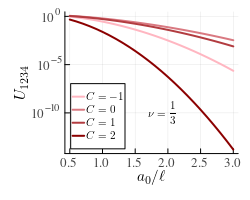

In [ ]:
a0_over_l_values = 0.5:0.1:3

# Values of ν
C_values = [-1,0,1,2]
nu = 0.333
c = 1.0
# Manually define a set of colors transitioning from blue
colors = cgrad(:reds, length(C_values))

# Create the plot
p = plot()
for (i, C) in enumerate(C_values)
    y_values_for_plot = [F_of_x_y_z_quadgk(pl_fun(a0_over_l, nu,C), ql_fun(a0_over_l, nu,C), c) for a0_over_l in a0_over_l_values]
    plot!(p, a0_over_l_values, y_values_for_plot, fontfamily = "Times", ylabel = L"U_{1234}", legend=:bottomleft,yaxis=:log10, label="\$C = $C\$", color=colors[i], linewidth=2,size = [250,200])
end
xlabel!(L"a_0/\ell")
annotate!(1.7,1e-10, text(L"\nu = \frac{1}{3}", :black, :left, 8, "Times"))
display(p)
#savefig(p, "figsaves/U1234bare1.pdf")

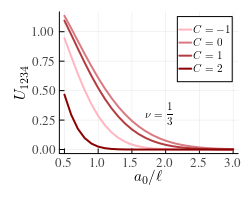

In [ ]:
a0_over_l_values = 0.5:0.1:3

# Values of ν
C_values = [-1,0,1,2]
nu = 0.333
c = 1.0
# Manually define a set of colors transitioning from blue
colors = cgrad(:reds, length(C_values))

# Create the plot
p = plot()
for (i, C) in enumerate(C_values)
    y_values_for_plot = [F_of_x_y_z_quadgk(pl_fun(a0_over_l, nu,C), ql_fun(a0_over_l, nu,C), c) for a0_over_l in a0_over_l_values]
    plot!(p, a0_over_l_values, y_values_for_plot, fontfamily = "Times", ylabel = L"U_{1234}", legend=:topright, label="\$C = $C\$", color=colors[i], linewidth=2,size = [250,200])
end
xlabel!(L"a_0/\ell")
annotate!(1.7,0.3, text(L"\nu = \frac{1}{3}", :black, :left, 8, "Times"))
display(p)
#savefig(p, "figsaves/U1234bare2.pdf")

# Theory of $c_*$

In [9]:
include("higherHallCrystals.jl")
using LinearAlgebra, Plots, .higherHall, Measures, LaTeXStrings, Colors

In [10]:
# Dispersion
x = range(0.0, 1, length=10^5)
y = cos.(2π*x)  # make sure it's periodic w/ period 1

N = 150  # total number of unit cells in system
lB = 1.0  # magnetic length
λ = 1.0  # scr. length 
inversion_symmetric = true
g₀ = 0.05  # hyperparameter, not sure what's best for this guy
d = 40 # max support of cosine operators
n = 5 # how many lowest operators to keep

# For plotting 
N_nu = 500
N_am = 500
nu_vec = LinRange(0.1, 0.9, N_nu)
log_am_vec = LinRange(log2(0.33), log2(5.0), N_am)
am_vec = 2 .^ log_am_vec;

In [4]:

# Function to compute the optimal C and its corresponding minimum value
function find_optimal_C(cstar::Float64, am::Float64, nu::Float64, lB::Float64, C_values::Vector{Int})
    factor = am / lB^2

    # Define the function to minimize
    f(C::Int) = abs(factor * abs(nu - C) - cstar)

    # Find the value of C that minimizes the function
    C_optimal = argmin(f, C_values)
    min_value = f(C_optimal)

    return C_optimal, min_value
end


find_optimal_C (generic function with 1 method)

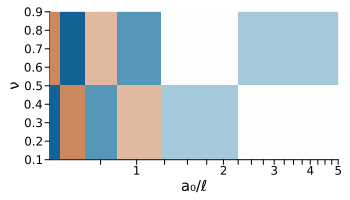

In [12]:
C_values = [-4,-3,-2,-1,0,1,2,3,4,5]::Vector{Int}
C_mat = zeros(Int64,N_am,N_nu)
cstar = 1.0


for (ia,am) in enumerate(am_vec)
    for (in, nu) in enumerate(nu_vec)
        C_opt, k_opt = find_optimal_C(cstar::Float64, am::Float64, nu::Float64, lB::Float64, C_values::Vector{Int})
        C_mat[ia,in] = C_opt
    end
end



# Plotting
# Adjustable parameters
xlabel_size = 10
ylabel_size = 10
ticklabel_size = 8
title_size = 14
xtick_positions = 0.75:0.25:5.0
xtick_labels = ["","1","","","","2","","","","3","","","","4","","","","5"]
xtick_labels = ["","1","","","","2","","","","3","","","","4","","","","5"]
ytick_values = 0:0.1:1
size_xy = [350, 200]
off_set = 3  # tunes the color palette

# Vector of Chern numbers
chern_vec = unique(C_mat)
# Generate phase_labels from chern_vec
phase_labels = ["C=$(v)" for v in sort(chern_vec)]

color_theme = palette(:vik, 2000)
phase_colors = vcat(color_theme[1600],color_theme[1400],color_theme[1200],RGB{Float64}(1.0,1.0,1.0),color_theme[800],color_theme[600],color_theme[400],color_theme[200])


# Create the heatmap with customized font sizes and tick values
p=heatmap(am_vec, nu_vec, C_mat',
    color=phase_colors,
    size=size_xy,
    xaxis=:log2,
    xlabel="a₀/ℓ",
    ylabel="ν",
    colorbar = false,
    xlim=[0.5,maximum(am_vec)],
    ylim=[minimum(nu_vec), maximum(nu_vec)],
    xlabelfontsize=xlabel_size,
    ylabelfontsize=ylabel_size,
    xtickfontsize=ticklabel_size,
    ytickfontsize=ticklabel_size,
    titlefontsize=title_size,
    yticks=ytick_values,
    xticks=(xtick_positions, xtick_labels),
    tick_direction=:out,
    grid = false,
    bottom_margin=1.5mm,
    axesfont=font(20,"Times New Roman")
)
# Display the plot
display(current())  # To explicitly display the plot in some environments
#savefig(p, "figsaves/phasediagramcstar_cstar=$(cstar).pdf")

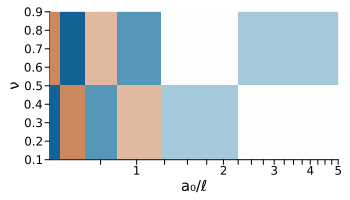

In [13]:
C_values = [-4,-3,-2,-1,0,1,2,3,4,5]::Vector{Int}
C_mat = zeros(Int64,N_am,N_nu)
cstar = 1.0


for (ia,am) in enumerate(am_vec)
    for (in, nu) in enumerate(nu_vec)
        C_opt, k_opt = find_optimal_C(cstar::Float64, am::Float64, nu::Float64, lB::Float64, C_values::Vector{Int})
        C_mat[ia,in] = C_opt
    end
end



# Plotting
# Adjustable parameters
xlabel_size = 10
ylabel_size = 10
ticklabel_size = 8
title_size = 14
xtick_positions = 0.75:0.25:5.0
xtick_labels = ["","1","","","","2","","","","3","","","","4","","","","5"]
xtick_labels = ["","1","","","","2","","","","3","","","","4","","","","5"]
ytick_values = 0:0.1:1
size_xy = [350, 200]
off_set = 3  # tunes the color palette

# Vector of Chern numbers
chern_vec = unique(C_mat)
# Generate phase_labels from chern_vec
phase_labels = ["C=$(v)" for v in sort(chern_vec)]

color_theme = palette(:vik, 2000)
phase_colors = vcat(color_theme[1600],color_theme[1400],color_theme[1200],RGB{Float64}(1.0,1.0,1.0),color_theme[800],color_theme[600],color_theme[400],color_theme[200])


# Create the heatmap with customized font sizes and tick values
p=heatmap(am_vec, nu_vec, C_mat',
    color=phase_colors,
    size=size_xy,
    xaxis=:log2,
    xlabel="a₀/ℓ",
    ylabel="ν",
    colorbar = false,
    xlim=[0.5,maximum(am_vec)],
    ylim=[minimum(nu_vec), maximum(nu_vec)],
    xlabelfontsize=xlabel_size,
    ylabelfontsize=ylabel_size,
    xtickfontsize=ticklabel_size,
    ytickfontsize=ticklabel_size,
    titlefontsize=title_size,
    yticks=ytick_values,
    xticks=(xtick_positions, xtick_labels),
    tick_direction=:out,
    grid = false,
    bottom_margin=1.5mm,
    axesfont=font(20,"Times New Roman")
)
# Display the plot
display(current())  # To explicitly display the plot in some environments
#savefig(p, "figsaves/phasediagramcstar_cstar=$(cstar).pdf")